# Table of Contents
## 1.0 Setup
## 2.0 Data Cleaning and Wrangling
## 3.0 Data preparation for clustering - the elbow technique
## 4.0 k-means Clustering

## 1.0 Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import pylab as pl
import sklearn
from sklearn.cluster import KMeans

In [2]:
# Defining the path

path = (r'E:\OneDrive\ANITA\DATA ANALYST\IMMERSION\Achievement 6\11-22 Food Balance Sheet Analysis\2.0 Data')

In [3]:
# Importing ct_6_variables.pkl as fbs

fbs = pd.read_pickle(os.path.join(path, '2.2 Prepared data', 'ct_6_variables.pkl'))

In [4]:
# Setting up graph display options

%matplotlib inline

In [5]:
# Setting up display options

pd.set_option('display.max_rows', None)

## 2.0 Data Cleaning and Wrangling

In [6]:
fbs

Element,Country,Domestic Supply Quantity,Export Quantity,Food,Import Quantity,Production,Total Population,Import Dependency Ratio,IDR category
0,Afghanistan,179.486857,11.576763,170.102359,58.629336,217.419188,3.374120e+04,22.168467,Medium dependency
1,Albania,50.340385,2.099728,40.786616,9.844953,65.947842,2.901600e+03,13.359402,Low dependency
2,Algeria,449.583848,8.237230,348.834351,183.963859,434.687213,3.940350e+04,30.137563,Medium dependency
3,Angola,286.687785,1.100793,205.286628,42.068218,364.514131,2.748210e+04,10.374878,Low dependency
4,Antigua and Barbuda,0.865092,0.007495,0.585941,0.686329,0.471970,9.290000e+01,59.639123,High dependency
5,Argentina,1342.280881,679.125152,411.657386,28.497982,2302.371667,4.284680e+04,1.725326,Low dependency
6,Armenia,45.790044,2.496912,34.620377,9.080705,75.911389,2.916500e+03,11.007558,Low dependency
7,Australia,760.241937,423.269300,255.903174,61.131056,1333.165201,2.373300e+04,6.295506,Low dependency
8,Austria,203.015216,71.773605,88.389652,88.885618,280.691572,8.662900e+03,29.847061,Medium dependency
9,Azerbaijan,130.208103,10.299678,100.388698,29.268245,169.999665,9.553600e+03,15.488447,Low dependency


In [7]:
fbs.shape

(180, 9)

In [8]:
# Creating Self-sufficiency Ratio variable

fbs['Self-sufficiency Ratio'] = fbs['Production'] * 100 / (fbs['Production'] + fbs['Import Quantity'] - fbs['Export Quantity'])

In [9]:
fbs.head()

Element,Country,Domestic Supply Quantity,Export Quantity,Food,Import Quantity,Production,Total Population,Import Dependency Ratio,IDR category,Self-sufficiency Ratio
0,Afghanistan,179.486857,11.576763,170.102359,58.629336,217.419188,33741.2,22.168467,Medium dependency,82.208848
1,Albania,50.340385,2.099728,40.786616,9.844953,65.947842,2901.6,13.359402,Low dependency,89.489886
2,Algeria,449.583848,8.237230,348.834351,183.963859,434.687213,39403.5,30.137563,Medium dependency,71.211887
3,Angola,286.687785,1.100793,205.286628,42.068218,364.514131,27482.1,10.374878,Low dependency,89.896600
4,Antigua and Barbuda,0.865092,0.007495,0.585941,0.686329,0.471970,92.9,59.639123,High dependency,41.012180


In [10]:
fbs.shape

(180, 10)

In [11]:
# Dropping unnecessary variables ('Country','IDR category')

fbs_cl = fbs.drop(['Country', 'IDR category'], axis = 1)

In [12]:
fbs_cl.head()

Element,Domestic Supply Quantity,Export Quantity,Food,Import Quantity,Production,Total Population,Import Dependency Ratio,Self-sufficiency Ratio
0,179.486857,11.576763,170.102359,58.629336,217.419188,33741.2,22.168467,82.208848
1,50.340385,2.099728,40.786616,9.844953,65.947842,2901.6,13.359402,89.489886
2,449.583848,8.237230,348.834351,183.963859,434.687213,39403.5,30.137563,71.211887
3,286.687785,1.100793,205.286628,42.068218,364.514131,27482.1,10.374878,89.896600
4,0.865092,0.007495,0.585941,0.686329,0.471970,92.9,59.639123,41.012180


In [13]:
fbs_cl.isnull().sum()

Element
Domestic Supply Quantity    3
Export Quantity             3
Food                        3
Import Quantity             3
Production                  3
Total Population            4
Import Dependency Ratio     3
Self-sufficiency Ratio      3
dtype: int64

In [14]:
fbs_cl = fbs_cl.dropna()

## 3.0 Data preparation for clustering - the elbow technique

In [15]:
# Defining the number of potential clusters

fbs_cl_num_cl = range(1, 10)

kmeans = [KMeans(n_clusters = i) for i in fbs_cl_num_cl]

In [16]:
# Determining the number of clusters

score = [kmeans[i].fit(fbs_cl).score(fbs_cl) for i in range(len(kmeans))]

score

[-3938511903877.3335,
 -377914633972.3632,
 -122763409785.67047,
 -60806971462.98169,
 -39485179188.018585,
 -25954022519.78288,
 -17195134980.568466,
 -12173788038.732803,
 -8487034411.880963]

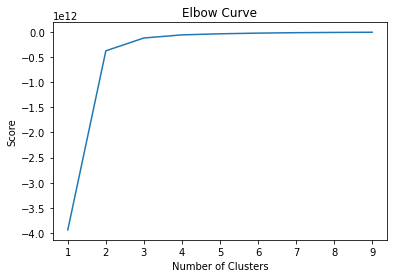

In [17]:
# Plotting the elbow curve using PyLab.

pl.plot(fbs_cl_num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

According to the elbow technique, the optimal number of clusters is three.

## 4.0 k-means Clustering

In [18]:
# Creating the k-means object

fbs_cl_kmeans = KMeans(n_clusters = 3)

In [19]:
fbs_cl.dtypes

Element
Domestic Supply Quantity    float64
Export Quantity             float64
Food                        float64
Import Quantity             float64
Production                  float64
Total Population            float64
Import Dependency Ratio     float64
Self-sufficiency Ratio      float64
dtype: object

In [20]:
# Fitting the k-means object to the data

fbs_cl_kmeans.fit(fbs_cl)

KMeans(n_clusters=3)

In [21]:
fbs_cl['Clusters'] = fbs_cl_kmeans.fit_predict(fbs_cl)

In [22]:
fbs_cl

Element,Domestic Supply Quantity,Export Quantity,Food,Import Quantity,Production,Total Population,Import Dependency Ratio,Self-sufficiency Ratio,Clusters
0,179.486857,11.576763,170.102359,58.629336,217.419188,3.374120e+04,22.168467,82.208848,1
1,50.340385,2.099728,40.786616,9.844953,65.947842,2.901600e+03,13.359402,89.489886,1
2,449.583848,8.237230,348.834351,183.963859,434.687213,3.940350e+04,30.137563,71.211887,1
3,286.687785,1.100793,205.286628,42.068218,364.514131,2.748210e+04,10.374878,89.896600,1
4,0.865092,0.007495,0.585941,0.686329,0.471970,9.290000e+01,59.639123,41.012180,1
5,1342.280881,679.125152,411.657386,28.497982,2302.371667,4.284680e+04,1.725326,139.390303,1
6,45.790044,2.496912,34.620377,9.080705,75.911389,2.916500e+03,11.007558,92.019180,1
7,760.241937,423.269300,255.903174,61.131056,1333.165201,2.373300e+04,6.295506,137.294355,1
8,203.015216,71.773605,88.389652,88.885618,280.691572,8.662900e+03,29.847061,94.253927,1
9,130.208103,10.299678,100.388698,29.268245,169.999665,9.553600e+03,15.488447,89.962034,1


In [23]:
fbs_cl['Clusters'].value_counts()

1    161
2     13
0      2
Name: Clusters, dtype: int64

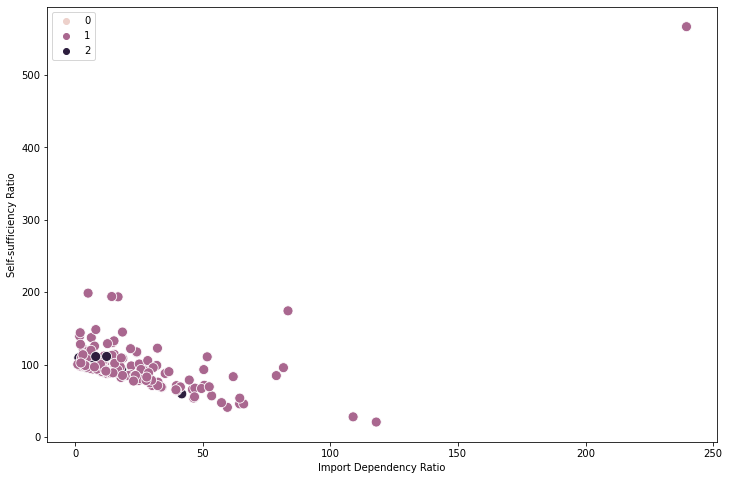

In [24]:
# Plotting the clusters for the 'Import Dependency Ratio' and 'Self-sufficiency ratio' variables

plt.figure(figsize = (12,8))

ax = sns.scatterplot(x = fbs_cl['Import Dependency Ratio'], y = fbs_cl['Self-sufficiency Ratio'], hue = fbs_cl_kmeans.labels_, s = 100) 
ax.grid(False)
plt.xlabel('Import Dependency Ratio')
plt.ylabel('Self-sufficiency Ratio')
plt.show()

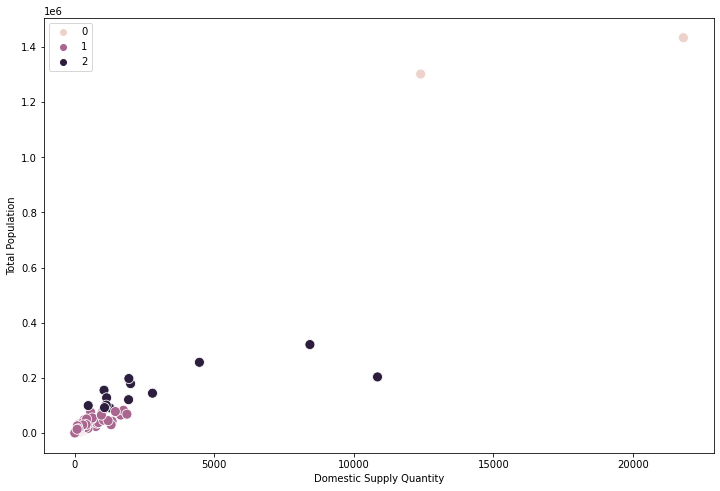

In [25]:
# Plotting the clusters for the 'Domestic Supply Quantity' and 'Total Population' variables

plt.figure(figsize = (12,8))

ax = sns.scatterplot(x = fbs_cl['Domestic Supply Quantity'], y = fbs_cl['Total Population'], hue = fbs_cl_kmeans.labels_, s = 100) 
ax.grid(False)
plt.xlabel('Domestic Supply Quantity')
plt.ylabel('Total Population')
plt.show()

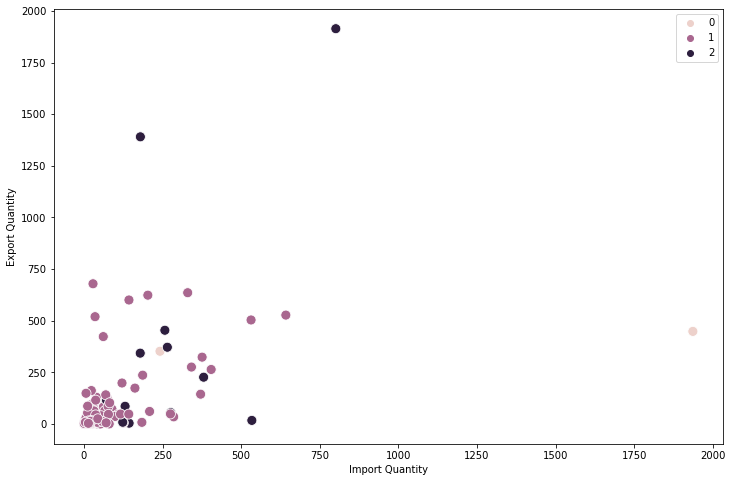

In [26]:
# Plotting the clusters for the 'Import Quantity' and 'Export Quantity' variables

plt.figure(figsize = (12,8))

ax = sns.scatterplot(x = fbs_cl['Import Quantity'], y = fbs_cl['Export Quantity'], hue = fbs_cl_kmeans.labels_, s = 100) 
ax.grid(False)
plt.xlabel('Import Quantity')
plt.ylabel('Export Quantity')
plt.show()

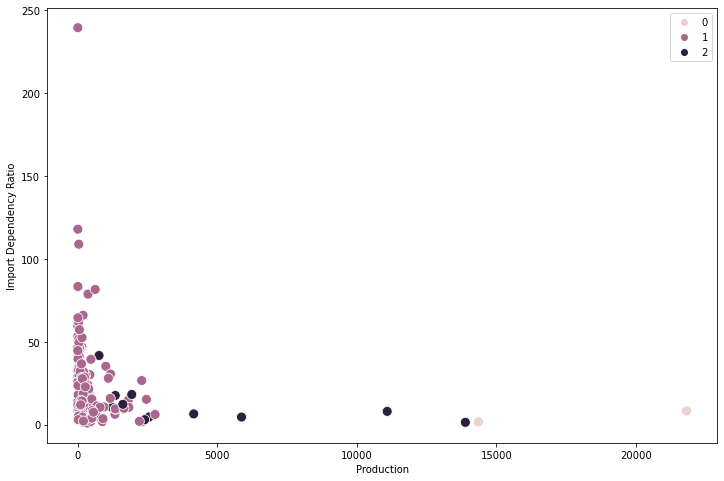

In [27]:
# Plotting the clusters for the 'Production' and 'Import Dependency Ratio' variables

plt.figure(figsize = (12,8))

ax = sns.scatterplot(x = fbs_cl['Production'], y = fbs_cl['Import Dependency Ratio'], hue = fbs_cl_kmeans.labels_, s = 100) 
ax.grid(False)
plt.xlabel('Production')
plt.ylabel('Import Dependency Ratio')
plt.show()

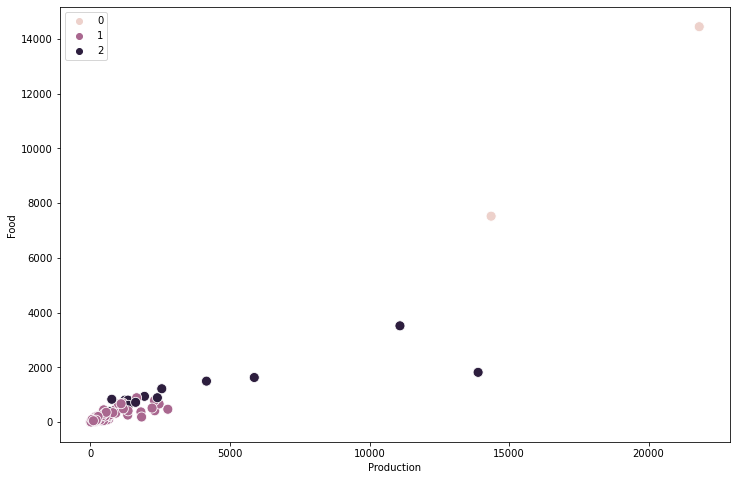

In [28]:
# Plotting the clusters for the 'Food' and 'Production' variables

plt.figure(figsize = (12,8))

ax = sns.scatterplot(x = fbs_cl['Production'], y = fbs_cl['Food'], hue = fbs_cl_kmeans.labels_, s = 100) 
ax.grid(False)
plt.xlabel('Production')
plt.ylabel('Food')
plt.show()

In [29]:
# Assigning labels to numerical cluster designations

fbs_cl.loc[fbs_cl['Clusters'] == 2, 'Cluster'] = 'dark purple'
fbs_cl.loc[fbs_cl['Clusters'] == 1, 'Cluster'] = 'purple'
fbs_cl.loc[fbs_cl['Clusters'] == 0, 'Cluster'] = 'pink'

In [30]:
# Calculating basic descriptive statistics for variables grouped by cluster

fbs_cl.groupby('Cluster').agg({
                        'Import Dependency Ratio':['mean', 'median'], 
                        'Self-sufficiency Ratio':['mean', 'median'], 
                        'Total Population':['mean', 'median'],
                        'Production':['mean', 'median'],
                        'Domestic Supply Quantity':['mean', 'median'],
                        'Import Quantity':['mean', 'median'],
                        'Export Quantity':['mean', 'median']})

Element     Import Dependency Ratio            Self-sufficiency Ratio  \
                               mean     median                   mean   
Cluster                                                                 
dark purple               10.977048   8.027056              96.806278   
pink                       5.003053   5.003053              97.195822   
purple                    23.103936  14.800405              98.346629   

Element                Total Population                Production  \
                median             mean      median          mean   
Cluster                                                             
dark purple  97.157734     1.608421e+05   144512.10   3758.615079   
pink         97.195822     1.367809e+06  1367809.35  18085.488483   
purple       94.253927     1.526988e+04     8227.70    329.884058   

Element                   Domestic Supply Quantity                \
                   median                     mean        median   
Cluster                                                            
dark purple   1934.614350              2966.972927   1933.319657   
pink         18085.488483             17100.648830  17100.648830   
purple         156.964745               235.933755    110.196977   

Element     Import Quantity              Export Quantity              
                       mean       median            mean      median  
Cluster                                                               
dark purple      259.363790   179.172976      384.765836  116.711293  
pink            1089.043023  1089.043023      400.397718  400.397718  
purple            52.926167    19.343437       59.026249    8.878175

If anything, the clustering showed that no two variables could be singled out as a definite pair of variables to determine the country's capability to feed its population.

As in previous analysis, there are some general observations that can be confirmed (the higher the population, the higher the production; the weak negative relationship between the import dependency and self-sufficiency), but since the vast majority of the countries is in the same cluster, it is questionable was the k-mean clustering an appropriate method.

It seems, however, that the outliers are grouped into two clusters, and of the two, the 'purple' cluster has two interesting qualities:
    1. it has the highest mean and median total population
    2. the differences between mean and median values for all variables are minimal.

Additionally, the basic descriptive statistics showed one oddity: the mean and median self-sufficiency ratios are practically the same for all three clusters, with different import dependency ratios.

Further analysis is needed and it should include adding per capita variables.